In [1]:
# import the necessary packages
from scipy.spatial import distance as dist
from imutils import perspective
from imutils import contours
import numpy as np
import imutils
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas
import time
%matplotlib inline

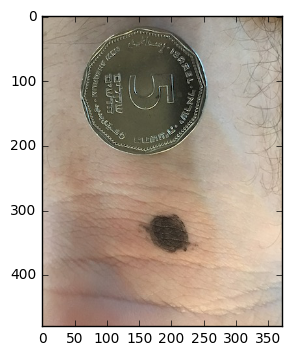

In [2]:
image_path = '3.jpg'
image = cv2.imread(image_path)
img = mpimg.imread(image_path)
plt.imshow(img,cmap='gray')

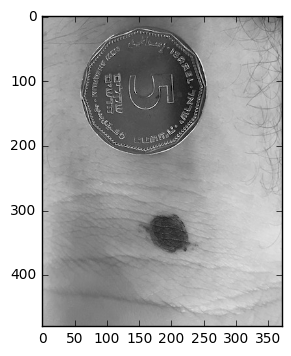

In [3]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray')

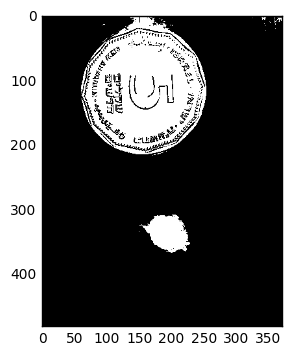

In [4]:
ret, edged = cv2.threshold(gray,99,250,cv2.THRESH_BINARY_INV)
plt.imshow(edged,cmap='gray')

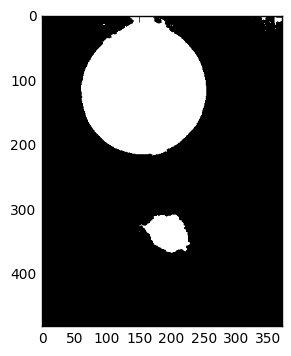

In [5]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
smooth = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel)
plt.imshow(smooth,cmap='gray')

In [6]:
ret, labels, stats, centroids  = cv2.connectedComponentsWithStats(smooth, 4)

In [7]:
connected_components_size = stats[:,-1]
connected_components_size = np.sort(connected_components_size)

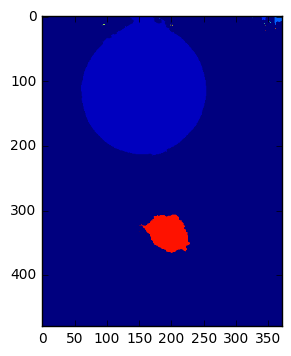

In [8]:
plt.imshow(labels)

In [9]:
coin_size_px = connected_components_size[-2]
spot_size_px = connected_components_size[-3]

pixelArea = coin_size_px
inchArea = 0.70121
ratio = inchArea/pixelArea

coin_size = round((ratio * coin_size_px), 3)
spot_size = round((ratio * spot_size_px), 3)


print('***\n The size (area) of your mole is: ' + str(spot_size) + ' in.\n***')


***
 The size (area) of your mole is: 0.065 in.
***


In [10]:
data = pandas.read_csv('data.csv')
data.title = "New"
compare = data["Area"].max()
print("Mole History: \n")
print(data)
print("4  " + str(spot_size) + "  Today")

growth = (compare / spot_size)* 100

print("\n Your mole has grown by **" + str(round(growth,3)) + "** percent since your last capture.")

Mole History: 

    Area     Date
0  0.045   1/2/17
1  0.049   1/9/17
2  0.053  1/13/17
3  0.060  1/16/17
4  0.065  Today

 Your mole has grown by **92.308** percent since your last capture.
